# GMSL Analysis and Prediction 

In [408]:
import pandas as pd
import seaborn as sb

In [409]:
df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

In [410]:
df.head().append(df.tail())

,Date,Extent,WaterTemp,O2ml,SiO3,NO3,LandAverageTemperature,LandAndOceanAverageTemperature,CO2,IsGMSLIncreased
0,1969-01,11.412998,13.265000,5.595000,7.00000,3.250,1.966,13.518,324.00,0
1,1969-02,11.419180,12.435000,5.695000,6.40000,5.200,2.450,13.747,324.42,0
2,1969-03,11.425310,15.535000,5.490000,4.00000,0.300,5.131,14.576,325.64,1
3,1969-04,11.431388,12.070000,5.312500,8.50000,6.400,8.576,15.518,326.66,0
4,1969-05,11.437415,12.120000,5.945000,6.00000,3.700,11.354,16.329,327.34,0
535,2013-08,12.338645,12.053062,5.263625,7.47125,8.925,14.742,17.462,395.20,1
536,2013-09,12.298467,12.200875,5.302750,6.75750,8.100,13.154,16.894,393.45,0
537,2013-10,13.236306,12.348688,5.341875,6.04375,7.275,10.256,15.905,393.70,0
538,2013-11,13.405600,12.496500,5.381000,5.33000,6.450,7.424,15.107,395.16,0
539,2013-12,13.066000,13.062250,5.427250,4.62625,4.275,4.724,14.339,396.84,0


In [411]:
df.describe()

,Extent,WaterTemp,O2ml,SiO3,NO3,LandAverageTemperature,LandAndOceanAverageTemperature,CO2,IsGMSLIncreased
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,11.633582,12.703859,5.140705,8.623137,7.488843,9.091504,15.553526,355.062907,0.525926
std,1.257900,1.178649,0.613406,5.566774,4.980329,4.156488,1.233037,34.925471,0.499790
min,8.441054,9.187500,2.320000,1.900000,0.000000,1.882000,13.298000,-99.990000,0.000000
25%,10.981980,11.967042,5.050313,5.451974,3.850000,4.959750,14.386250,338.025000,0.000000
50%,11.750654,12.453371,5.307197,7.508352,6.741667,9.342500,15.581000,355.390000,1.000000
75%,12.585463,13.278750,5.483333,10.000000,9.917708,13.153250,16.729750,373.890000,1.000000
max,14.050833,18.627500,6.150000,41.400000,22.900000,15.482000,17.609000,399.780000,1.000000


#### Podela skupa podataka na training i test

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            540 non-null    object 
 1   Extent                          540 non-null    float64
 2   WaterTemp                       540 non-null    float64
 3   O2ml                            540 non-null    float64
 4   SiO3                            540 non-null    float64
 5   NO3                             540 non-null    float64
 6   LandAverageTemperature          540 non-null    float64
 7   LandAndOceanAverageTemperature  540 non-null    float64
 8   CO2                             540 non-null    float64
 9   IsGMSLIncreased                 540 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 42.3+ KB


In [413]:
from sklearn.model_selection import train_test_split

X = df.drop(["IsGMSLIncreased", "Date"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

In [414]:
X_test = ((X_test-X_train.min())/(X_train.max()-X_train.min())).to_numpy()

#### Normalizaciju vrednosti atributa

In [415]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# sc = StandardScaler()
sc = preprocessing.MinMaxScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

## Naive Bayes

In [416]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#### Obučavanje - Naive Bayes

In [417]:
nb.fit(X_train, Y_train)

GaussianNB()

#### Predikcija - Naive Bayes

In [418]:
nb_predictions = nb.predict(X_test)
print("Naive Bayes predictions: ", nb_predictions)

Naive Bayes predictions:  [1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1]


#### Score - Naive Bayes

In [419]:
print("Naive Bayes score: ", nb.score(X_test, Y_test))

Naive Bayes score:  0.5481481481481482


In [420]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(Y_test, nb_predictions)
print("Accuracy score: ", ac)

Accuracy score:  0.5481481481481482


#### F1 Score - Naive Bayes

In [421]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.44036697 0.62111801]


#### Report - Naive Bayes

In [422]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        58
           1       0.60      0.65      0.62        77

    accuracy                           0.55       135
   macro avg       0.53      0.53      0.53       135
weighted avg       0.54      0.55      0.54       135



## SVM klasifikator

In [423]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')

#### Obučavanje - SVM

In [424]:
clf_svm.fit(X_train, Y_train)

SVC()

#### Predikcija - SVM

In [425]:
svm_predictions = clf_svm.predict(X_test)
print("SVM predictions: ", svm_predictions)

SVM predictions:  [1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0]


#### F1 Score - SVM

In [426]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.44036697 0.62111801]


#### Report - SVM

In [427]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        58
           1       0.60      0.65      0.62        77

    accuracy                           0.55       135
   macro avg       0.53      0.53      0.53       135
weighted avg       0.54      0.55      0.54       135



# XGBoost

In [428]:
import xgboost as xgb

#### Ponovno učitavanje dataseta zbog kreiranja dtrain i dtest

In [429]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

X = df.drop(["IsGMSLIncreased", "Date"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

In [430]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [431]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# "Learn" the mean from the training data
mean_train = np.mean(Y_train)

# Get predictions on the test set
baseline_predictions = np.ones(Y_test.shape) * mean_train

# Compute MAE
mae_baseline = mean_absolute_error(Y_test, baseline_predictions)

print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.50


#### Definisanje parametara modela

In [432]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
}

In [433]:
params['eval_metric'] = "mae"
num_boost_round = 999

#### Obučavanje modela

In [434]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:0.49222
[1]	Test-mae:0.49626
[2]	Test-mae:0.49402
[3]	Test-mae:0.49046
[4]	Test-mae:0.49527
[5]	Test-mae:0.49539
[6]	Test-mae:0.49466
[7]	Test-mae:0.49518
[8]	Test-mae:0.49225
[9]	Test-mae:0.48917
[10]	Test-mae:0.49029
[11]	Test-mae:0.49340
[12]	Test-mae:0.49268
[13]	Test-mae:0.48876
[14]	Test-mae:0.48782
[15]	Test-mae:0.48335
[16]	Test-mae:0.48335
[17]	Test-mae:0.48537
[18]	Test-mae:0.48505
[19]	Test-mae:0.48657
[20]	Test-mae:0.48806
[21]	Test-mae:0.48716
[22]	Test-mae:0.48962
[23]	Test-mae:0.49153
[24]	Test-mae:0.49270
[25]	Test-mae:0.49526


In [435]:
print("Best MAE: {:.2f} with {} rounds".format(model.best_score, model.best_iteration + 1))

Best MAE: 0.48 with 17 rounds


#### Report - XGBoost bez optimizacije parametara

In [436]:
xgb_pred = model.predict(dtest)
xgb_predictions = [round(value) for value in xgb_pred]

In [437]:
f1_sc = f1_score(Y_test, xgb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.46511628 0.5106383 ]


In [438]:
print(classification_report(Y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        58
           1       0.56      0.47      0.51        77

    accuracy                           0.49       135
   macro avg       0.49      0.49      0.49       135
weighted avg       0.50      0.49      0.49       135



#### Unakrsna validacija pomoću XGBoost.

In [439]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [440]:
cv_results.head()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.465505,0.007034,0.499450,0.010603
1,0.439316,0.010747,0.503178,0.013240
2,0.413999,0.014849,0.504611,0.015097
3,0.396364,0.011921,0.500085,0.017702
4,0.372683,0.015913,0.498060,0.019201


In [441]:
cv_results['test-mae-mean'].min()
print("MIN MAE: {}".format(cv_results['test-mae-mean'].min()))

MIN MAE: 0.49805979999999994


Optimizacija parametara: **max_depth**, **min_child_weight**

In [442]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,30)
    for min_child_weight in range(1,20)
]

min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=999,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        

In [443]:
print("Best param: 'max_depth' : {}".format(best_params[0]))
print("Best param: 'min_child_weight' : {}".format(best_params[1]))
print("MAE: {}".format(min_mae))

Best param: 'max_depth' : 11
Best param: 'min_child_weight' : 2
MAE: 0.4748512


In [444]:
params['max_depth'] = 11
params['min_child_weight'] = 2
params

{'max_depth': 11,
 'min_child_weight': 2,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic',
 'eval_metric': 'mae'}

In [445]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:0.49898
[1]	Test-mae:0.49835
[2]	Test-mae:0.49492
[3]	Test-mae:0.49900
[4]	Test-mae:0.49617
[5]	Test-mae:0.50041
[6]	Test-mae:0.49781
[7]	Test-mae:0.49451
[8]	Test-mae:0.48747
[9]	Test-mae:0.48978
[10]	Test-mae:0.48577
[11]	Test-mae:0.48691
[12]	Test-mae:0.48472
[13]	Test-mae:0.48303
[14]	Test-mae:0.48374
[15]	Test-mae:0.48408
[16]	Test-mae:0.48284
[17]	Test-mae:0.48124
[18]	Test-mae:0.48010
[19]	Test-mae:0.47726
[20]	Test-mae:0.47616
[21]	Test-mae:0.47572
[22]	Test-mae:0.47556
[23]	Test-mae:0.47833
[24]	Test-mae:0.47727
[25]	Test-mae:0.47614
[26]	Test-mae:0.47977
[27]	Test-mae:0.47889
[28]	Test-mae:0.47773
[29]	Test-mae:0.47835
[30]	Test-mae:0.47912
[31]	Test-mae:0.47831
[32]	Test-mae:0.47819


In [446]:
xgb_pred = model.predict(dtest)
xgb_predictions = [round(value) for value in xgb_pred]

In [447]:
f1_sc = f1_score(Y_test, xgb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.46280992 0.56375839]


In [448]:
print(classification_report(Y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.44      0.48      0.46        58
           1       0.58      0.55      0.56        77

    accuracy                           0.52       135
   macro avg       0.51      0.51      0.51       135
weighted avg       0.52      0.52      0.52       135



#### Značajnost atributa po XGBoost.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

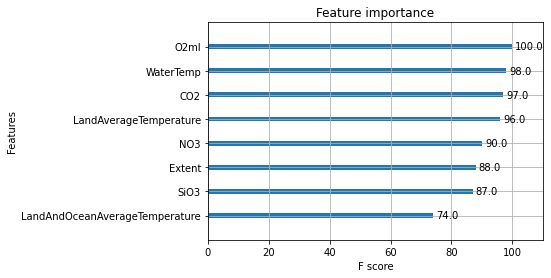

In [449]:
from xgboost import plot_importance

plot_importance(model)

#### GridSearch

In [450]:
# from sklearn.model_selection import GridSearchCV

# data = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

# X, y = data[data.columns.tolist()[1:-1]], data[data.columns.tolist()[-1]]

# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}

# xgbr = xgb.XGBRegressor(seed = 20)

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)

# clf.fit(X, y)

# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

#### RandomizedSearch

In [451]:
# from sklearn.model_selection import RandomizedSearchCV

# data = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

# X, y = data[data.columns.tolist()[1:-1]], data[data.columns.tolist()[-1]]

# params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': np.arange(0.5, 1.0, 0.1),
#            'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'n_estimators': [100, 500, 1000]}

# xgbr = xgb.XGBRegressor(seed = 20)

# clf = RandomizedSearchCV(estimator=xgbr,
#                          param_distributions=params,
#                          scoring='neg_mean_squared_error',
#                          n_iter=25,)

# clf.fit(X, y)

# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))